# Misharin (GSE127803) - processed.h5ad
Mice aged 8-10 weeks were instilled intratracheally with control particles or crocidolite asbestos fibers to induce lung fibrosis. Lungs were then harvested at different time points (depending on the analysis method).

Single-cell RNA sequencing was done on a HiSeq 4000 instrument (Illumina) using Chromium Single Cell v2 Reagent Kit and Controller for the library preparation.

In [1]:
import scanpy
import pandas as pd
import scib
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import anndata
import helper_classes_DanielStrobl
plt.rcParams['figure.figsize'] = (15, 15)

In [3]:
base = "GSE127803_RAW"
misharin = scanpy.read(base + '/processed.h5ad')   # read in data

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/X' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/layers' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/specs/registry.py:235: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=get_spec(elem))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/anndata/_io/h5ad.py:280: OldFormatWarning: '/obs' was written with a very old version of AnnData. Consider rewriting it.
  warn(
/Libr

## First analyses of the data:

In [35]:
misharin

AnnData object with n_obs × n_vars = 15365 × 17117
    obs: 'batch', 'cond', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors', 'louvain', 'mish_clusters', 'louvain_epi', 'louvain_macro', 'louvain_fibro', 'epi_all_score', 'is_krt8'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'is_krt8_colors', 'louvain', 'louvain_colors', 'louvain_fibro_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [36]:
misharin.obs   # information on cells

,batch,cond,n_counts,log_counts,n_genes,percent_mito,size_factors,louvain,mish_clusters,louvain_epi,louvain_macro,louvain_fibro,epi_all_score,is_krt8
index,,,,,,,,,,,,,,
SC14_AAACCTGAGCGTTCCG,0,SC14,1855.0,7.525640,749,0.0,0.380752,t-cells1,B cells,t-cells1,t-cells1,t-cells1,0.554678,no
SC14_AAACCTGAGGACATTA,0,SC14,1479.0,7.299121,629,0.0,0.309252,t-cells1,B cells,t-cells1,t-cells1,t-cells1,0.328899,no
SC14_AAACCTGAGTCGTTTG,0,SC14,2638.0,7.877776,1180,0.0,0.651934,alveolar macrophages,Alveolar macrophages,alveolar macrophages,"alveolar macrophages,0","alveolar macrophages,0",-0.597836,no
SC14_AAACCTGCACATCCGG,0,SC14,9452.0,9.153981,2498,0.0,2.227473,Monocytes,Classical monocytes,Monocytes,Monocytes,Monocytes,-3.121701,no
SC14_AAACCTGCACTAGTAC,0,SC14,3883.0,8.264363,1139,0.0,0.668605,b-cells,T cells,b-cells,b-cells,b-cells,0.391317,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC15_TTTGTCAGTGATGTGG,1,SC15,2724.0,7.909857,1141,0.0,0.655444,5,Non-classical monocytes,5,5,non-classical monocytes,-0.924487,no
SC15_TTTGTCAGTTCGCTAA,1,SC15,2193.0,7.693026,793,0.0,0.414185,b-cells,T cells,b-cells,b-cells,b-cells,0.306682,no
SC15_TTTGTCATCAGTCAGT,1,SC15,4270.0,8.359369,1638,0.0,1.126070,Monocytes,Classical monocytes,Monocytes,Monocytes,Monocytes,-1.542132,no


In [8]:
misharin.var

,n_cells,highly_variable,means,dispersions,dispersions_norm
index,,,,,
Gm37381,21,False,0.000470,0.368974,-1.967772
Rp1,96,False,0.002709,0.519569,-1.937386
Sox17,160,True,0.008407,0.979432,2.472385
Mrpl15,2749,False,0.129576,0.710804,-0.319532
Lypla1,2571,False,0.117211,0.696192,-0.967962
...,...,...,...,...,...
AC125149.3,60,False,0.003256,0.958529,1.665777
AC168977.1,27,False,0.001116,0.750387,-0.018821
PISD,5275,False,0.306364,0.747852,0.680018


In [37]:
misharin.obs.select_dtypes(include='category')

,batch,cond,louvain,mish_clusters,louvain_epi,louvain_macro,louvain_fibro,is_krt8
index,,,,,,,,
SC14_AAACCTGAGCGTTCCG,0,SC14,t-cells1,B cells,t-cells1,t-cells1,t-cells1,no
SC14_AAACCTGAGGACATTA,0,SC14,t-cells1,B cells,t-cells1,t-cells1,t-cells1,no
SC14_AAACCTGAGTCGTTTG,0,SC14,alveolar macrophages,Alveolar macrophages,alveolar macrophages,"alveolar macrophages,0","alveolar macrophages,0",no
SC14_AAACCTGCACATCCGG,0,SC14,Monocytes,Classical monocytes,Monocytes,Monocytes,Monocytes,no
SC14_AAACCTGCACTAGTAC,0,SC14,b-cells,T cells,b-cells,b-cells,b-cells,no
...,...,...,...,...,...,...,...,...
SC15_TTTGTCAGTGATGTGG,1,SC15,5,Non-classical monocytes,5,5,non-classical monocytes,no
SC15_TTTGTCAGTTCGCTAA,1,SC15,b-cells,T cells,b-cells,b-cells,b-cells,no
SC15_TTTGTCATCAGTCAGT,1,SC15,Monocytes,Classical monocytes,Monocytes,Monocytes,Monocytes,no


## Filtering outliers:
Previously done:
- sc.pp.filter_cells(misharin, max_counts=30000)
- sc.pp.filter_cells(misharin, max_genes=5200)
- sc.pp.filter_cells(misharin, min_genes=400)

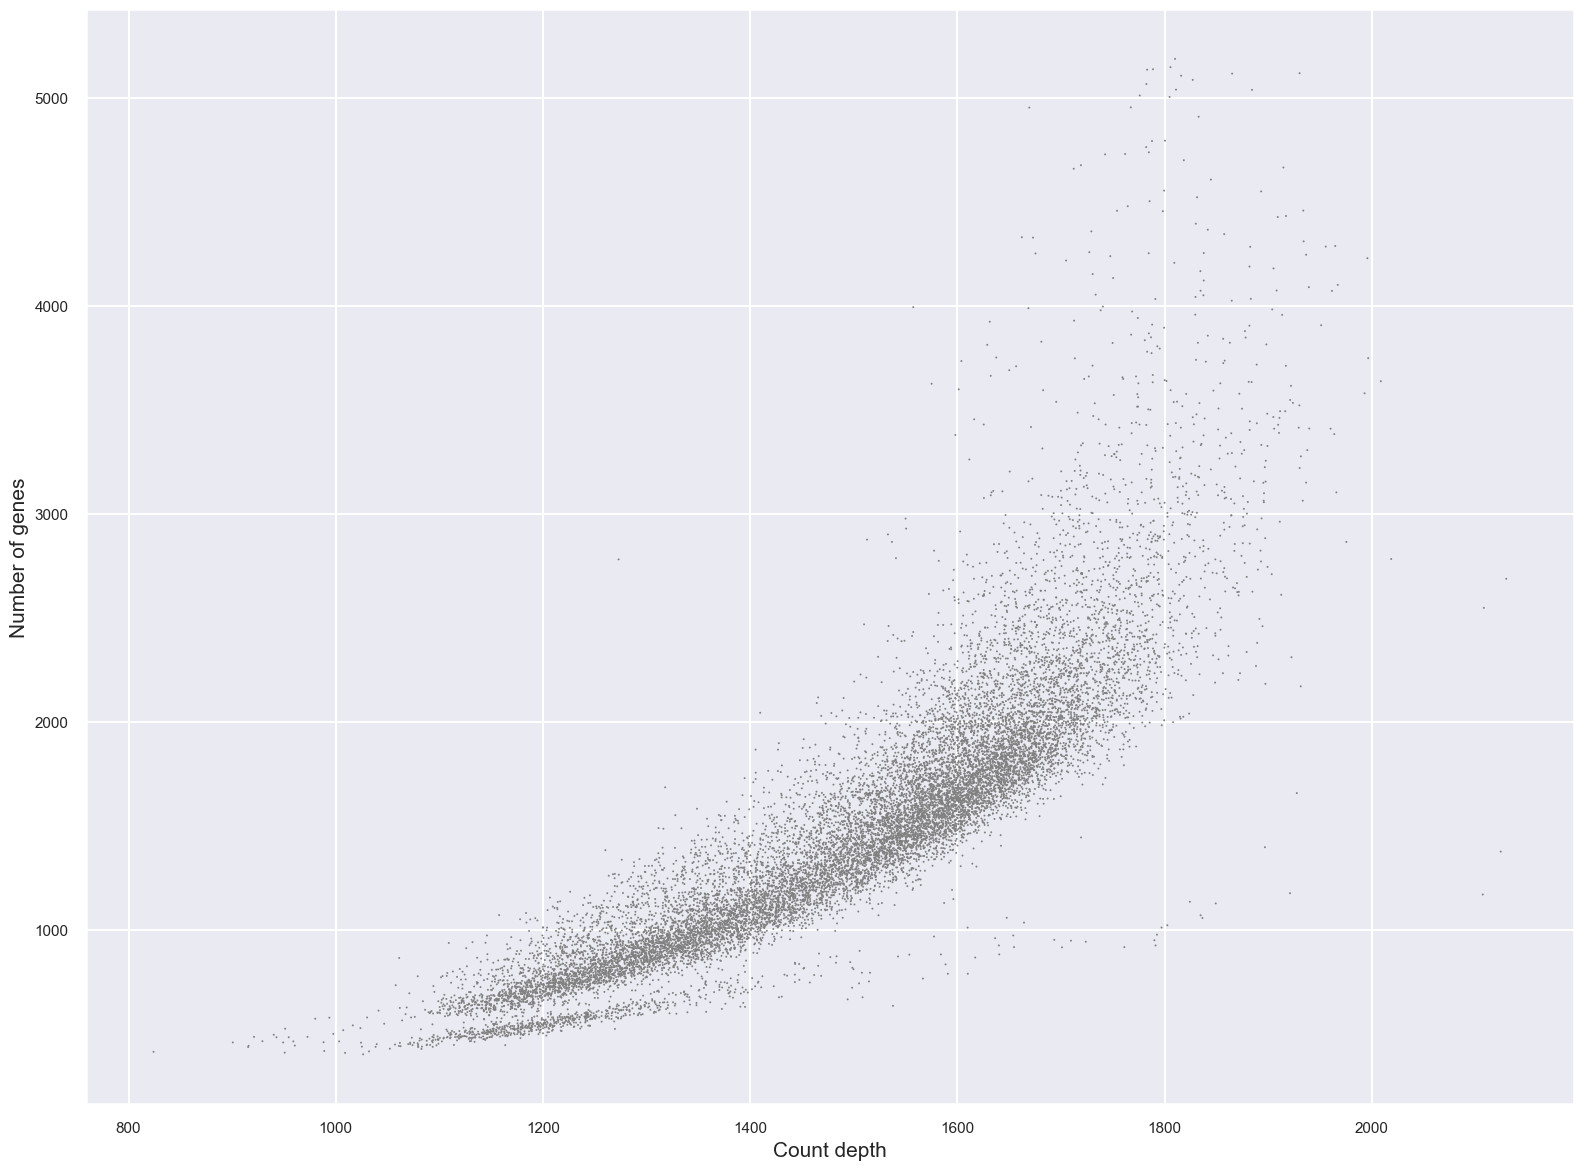

In [4]:
scib.pp.summarize_counts(misharin)
scib.pp.plot_qc(misharin)

Text(0, 0.5, 'Counts')

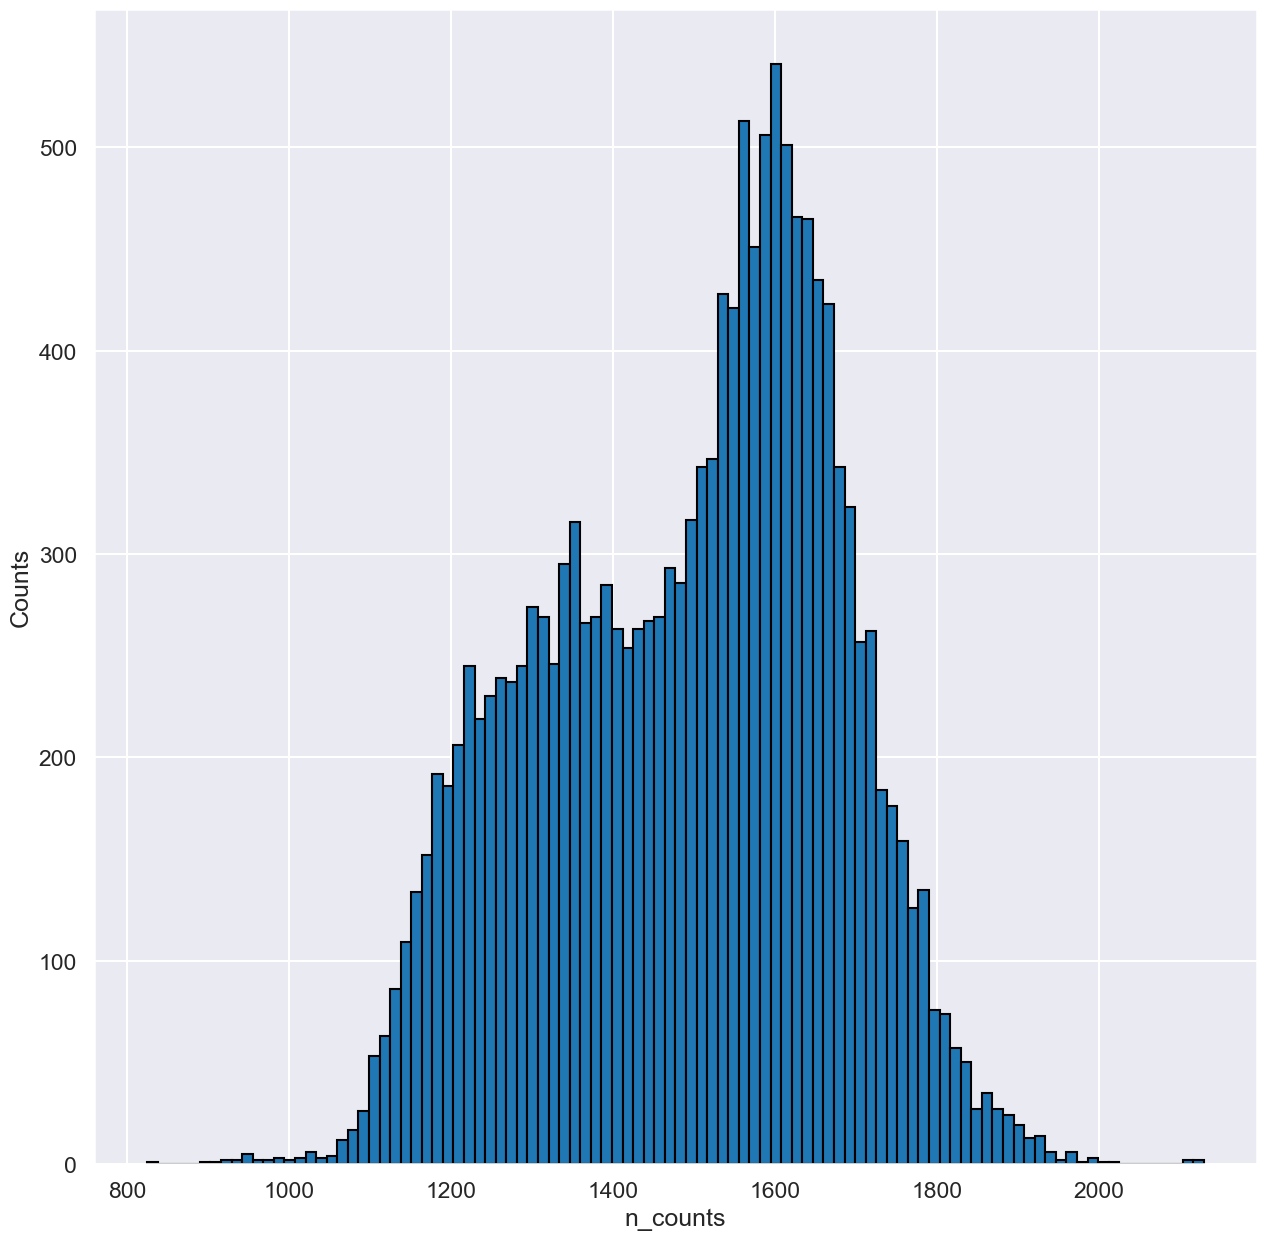

In [5]:
plt.hist(misharin.obs["n_counts"], bins=100, edgecolor='black')   # distribution of n_counts
plt.xlabel('n_counts')
plt.ylabel('Counts')

In [6]:
scanpy.pp.filter_cells(misharin, max_counts=30000)
scanpy.pp.filter_cells(misharin, max_genes=5200)
scanpy.pp.filter_cells(misharin, min_genes=400)

Text(0, 0.5, 'Counts')

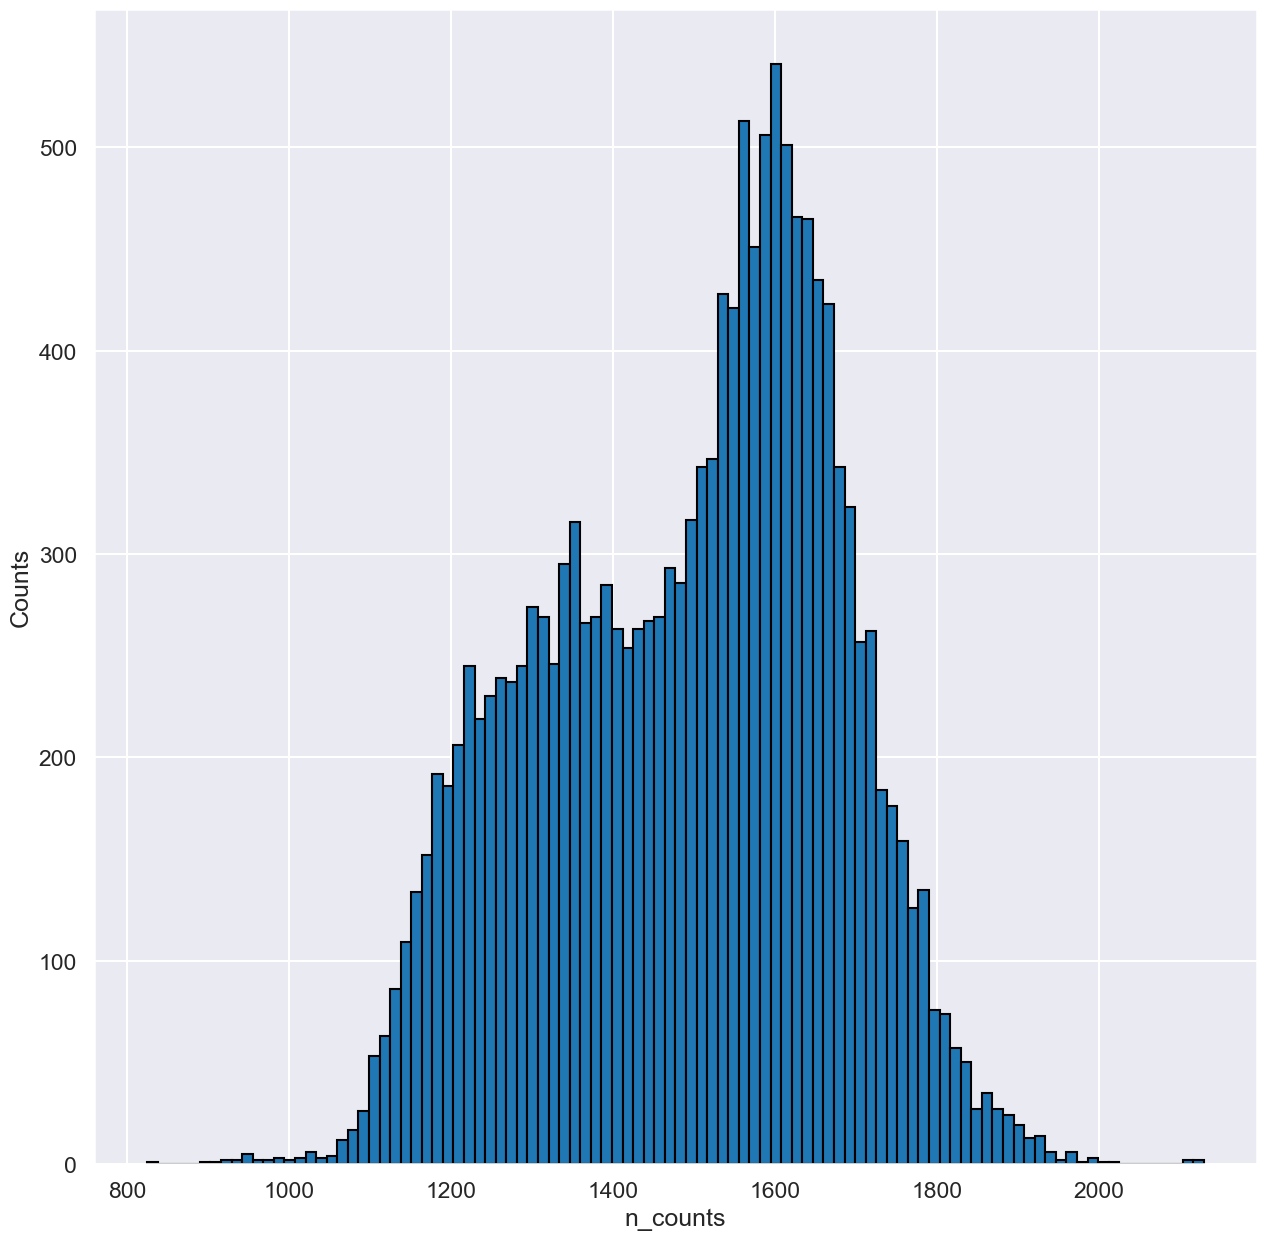

In [7]:
plt.hist(misharin.obs["n_counts"], bins=100, edgecolor='black')   # distribution of n_counts
plt.xlabel('n_counts')
plt.ylabel('Counts')

## UMAPs:
SC14 = 0 = Control
SC15 = 1 = Fibrosis

In [41]:
misharin.obs['cond']='control'
misharin.obs.loc[misharin.obs.batch=='1', 'cond']='fibrosis'

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


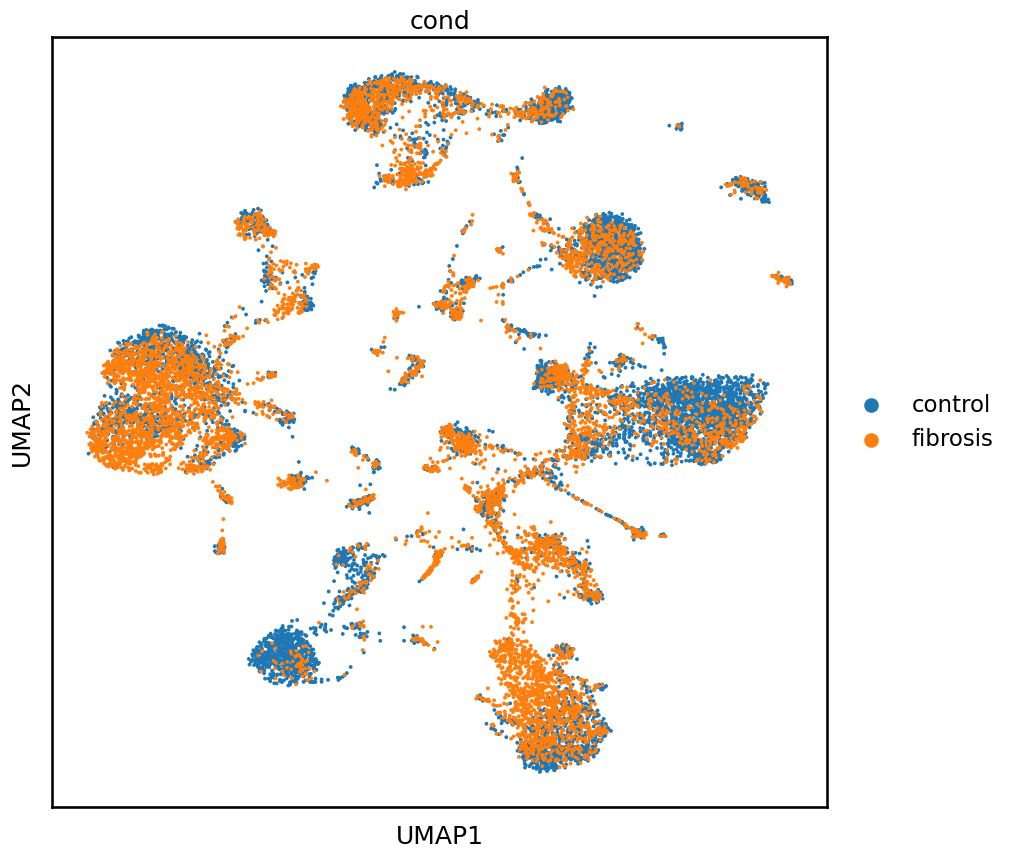

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


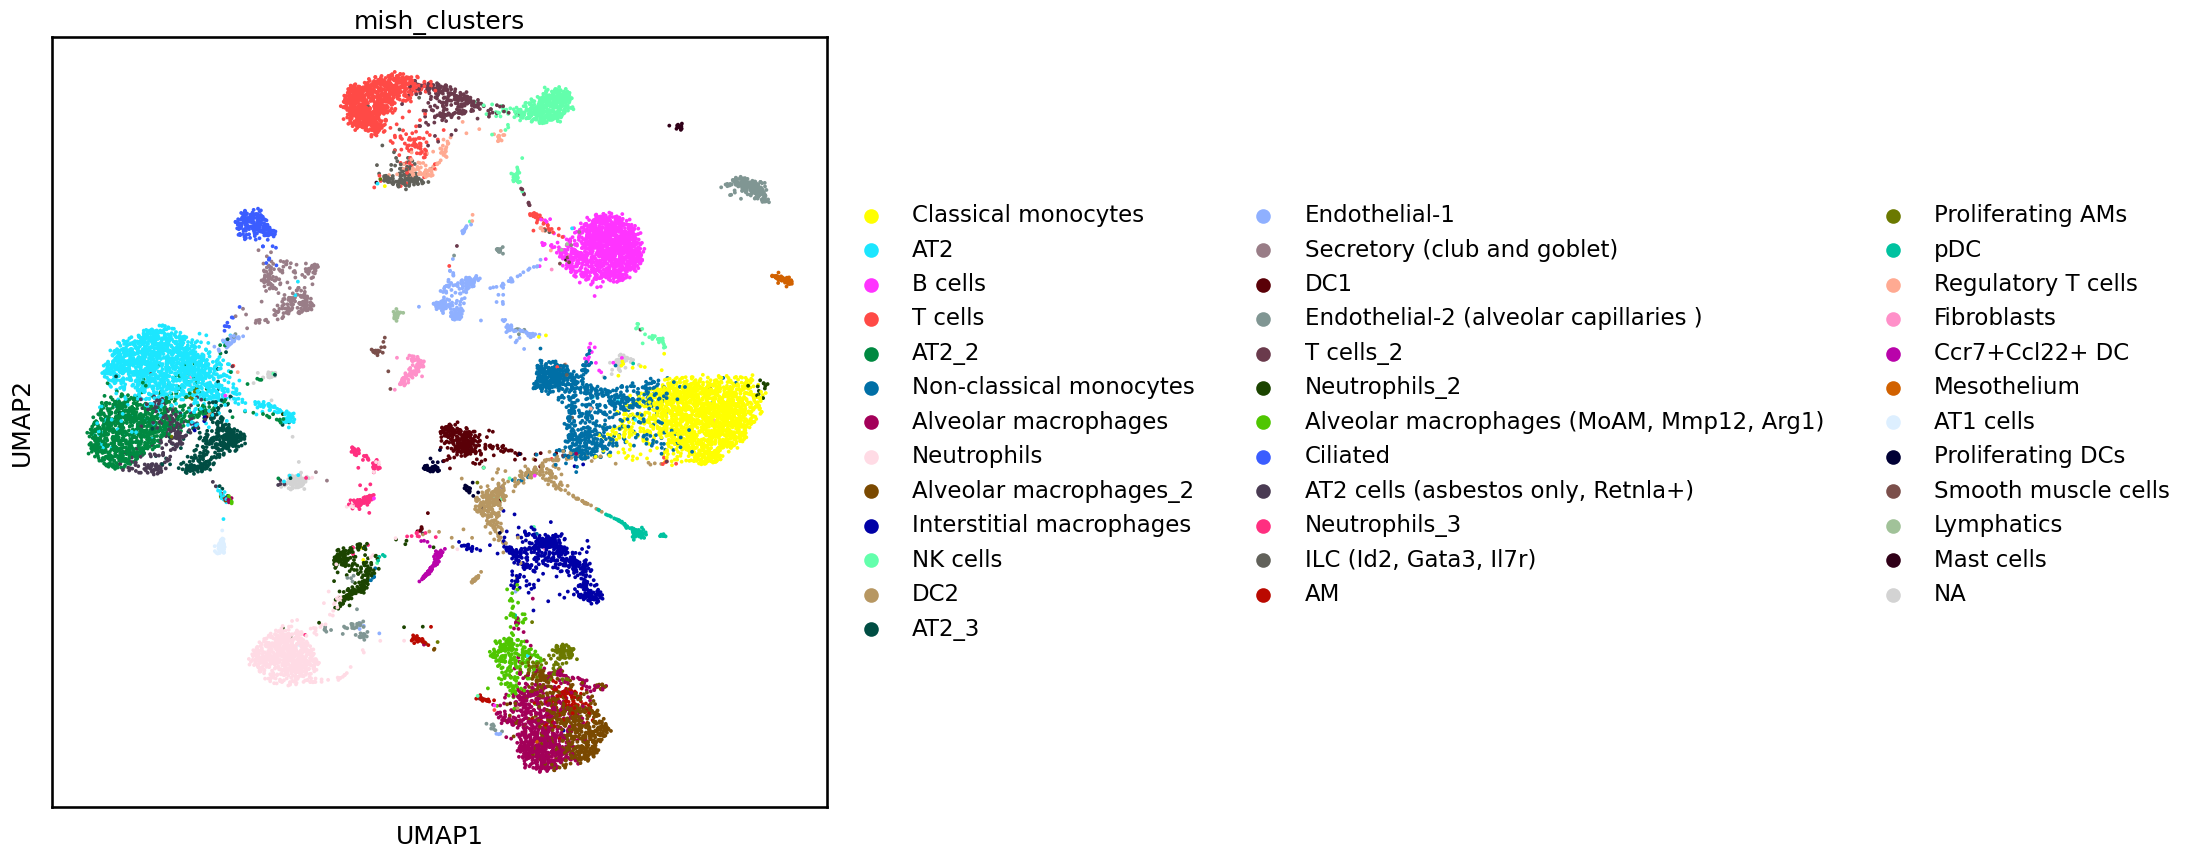

In [58]:
scanpy.pl.umap(misharin, color=['cond'], size=30)   # condition = batch
scanpy.pl.umap(misharin, color=['mish_clusters'], size=30)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


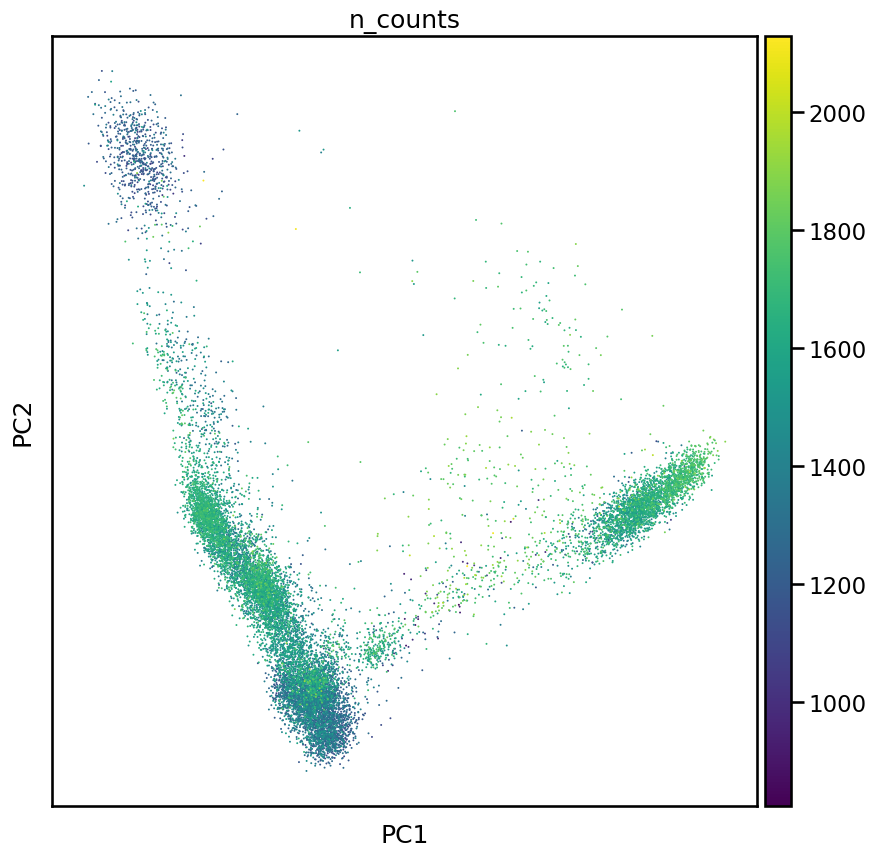

In [52]:
scanpy.pp.pca(misharin)
scanpy.pl.pca_scatter(misharin, color="n_counts")

In [59]:
(misharin.obs['cond']=='control').sum()

8248

In [60]:
(misharin.obs['cond']=='fibrosis').sum()

7117

In [61]:
(misharin.obs['cond']=='control').sum() + (misharin.obs['cond']=='fibrosis').sum()

15365